<a href="https://colab.research.google.com/github/ZiyadAlmatrafi/Data-science/blob/master/ML/sec13/Random_Forest_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Heuristic Models
Look at the Seattle weather in the **data** folder. Come up with a heuristic model to predict if it will rain today. Keep in mind this is a time series, which means that you only know what happened historically (before a given date). One example of a heuristic model is: It will rain tomorrow if it rained more than 1 inch (>1.0 PRCP) today. Describe your heuristic model in the next cell.

**your model here**  

Examples:  

If rained yesterday it will rain today.  
If it rained yesterday or the day before it will rain today.

In [1]:
#here is an example of how to build and populate a hurestic model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold 100 values
heuristic_df = pd.DataFrame({'yesterday':[0.0]*numrows,
                             'today':[0.0]*numrows,
                             'tomorrow':[0.0]*numrows,
                             'guess':[False]*numrows, #logical guess
                             'rain_tomorrow':[False]*numrows, #historical observation
                             'correct':[False]*numrows}) #TRUE if your guess matches the historical observation

#sort columns for convience
seq = ['yesterday','today','tomorrow','guess','rain_tomorrow','correct']
heuristic_df = heuristic_df.reindex(columns=seq)

In [2]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


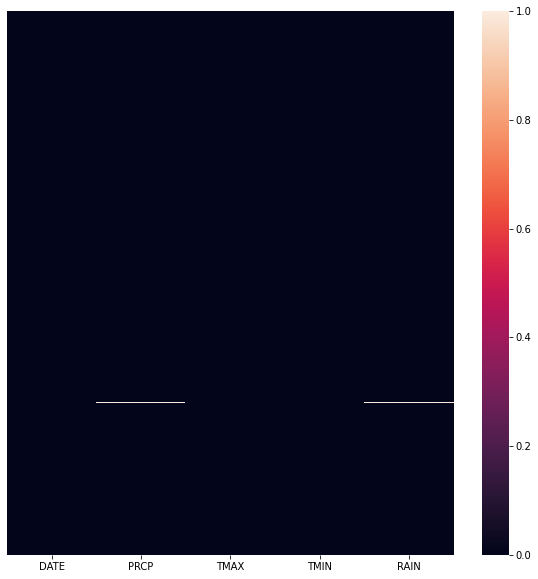

In [3]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(df),yticklabels=False)

In [4]:
df[pd.isnull(df['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [5]:
df[pd.isnull(df['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


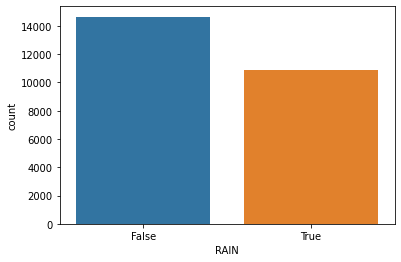

In [6]:
sns.countplot(data=df, x='RAIN')

In [7]:
df['PRCP'].mean()

0.10622162204477956

In [8]:
def RAIN_INSERTION(cols):
    RAIN=cols[0]
    if pd.isnull(RAIN):
        return 'False'
    else:
        return RAIN

In [9]:
def PRCP_INSERTION(col):
    PRCP=col[0]
    if pd.isnull(PRCP):
        return df['PRCP'].mean()
    else:
        return PRCP

In [10]:
df['RAIN']=df[['RAIN']].apply(RAIN_INSERTION,axis=1)

In [11]:
df['PRCP']=df[['PRCP']].apply(PRCP_INSERTION,axis=1)

In [12]:
df[pd.isnull(df['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN


In [13]:
df[pd.isnull(df['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN


## EDA

Text(0.5, 1.0, 'Precipitation Vs Minimum Temperature')

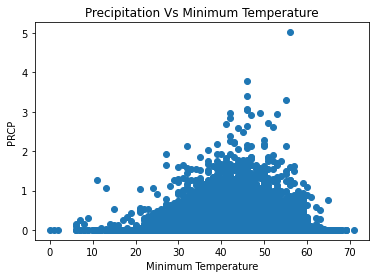

In [14]:
plt.scatter(x='TMIN',y='PRCP',data=df)
plt.xlabel('Minimum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Minimum Temperature')

Text(0.5, 1.0, 'Precipitation Vs Maximum Temperature')

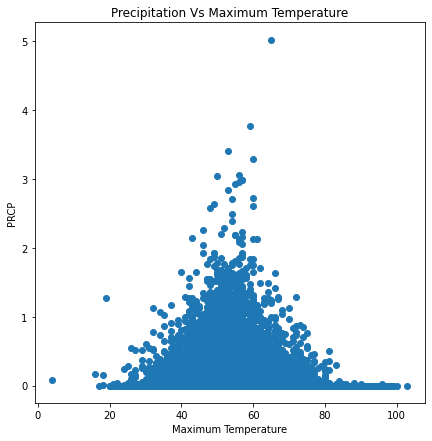

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(x='TMAX',y='PRCP',data=df)
plt.xlabel('Maximum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Maximum Temperature')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


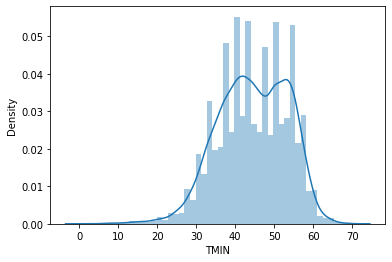

In [16]:
sns.distplot(df['TMIN'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


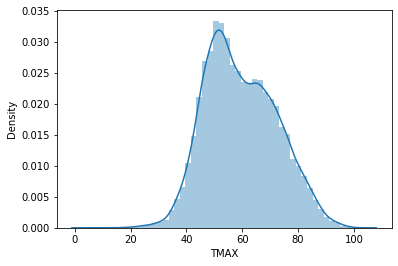

In [17]:
sns.distplot(df['TMAX'])

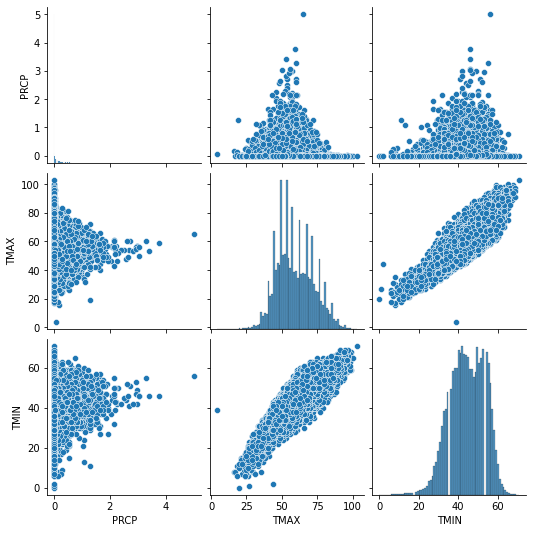

In [18]:
sns.pairplot(data=df)

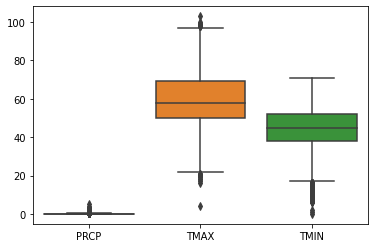

In [19]:
#plt.figure(figsize=(10,7))
sns.boxplot(data=df)

In [20]:
#Dropping the outliers from TMIN column
df=df.drop(df[df['TMIN']<17 ].index)


In [21]:
#Dropping the outliers from TMAX columns i.e. the value more than 100
df=df.drop(df[(df['TMAX']>97.5) | (df['TMAX']< 21.5)].index)


In [22]:
#Dropping the outliers from PRCP columns i.e. the value more than 0.275
df=df.drop(df[(df['PRCP']>0.25) | (df['PRCP']< -0.15) ].index)

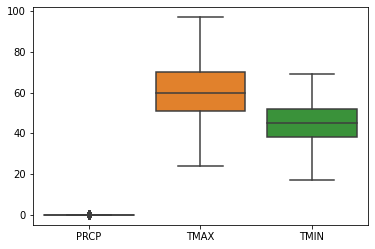

In [23]:
sns.boxplot(data=df)

**Random Forest Assignment**

In [24]:
from sklearn import ensemble

In [28]:
rf= ensemble.RandomForestClassifier(n_estimators=100)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X=df.drop(['RAIN','DATE'],axis=1)
y=df['RAIN']
y=y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
prediction=rf.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print('Confusion Matrix',confusion_matrix(y_test,prediction))
print('\n')
print('Classification Report',classification_report(y_test,prediction))

Confusion Matrix [[4343    1]
 [   0 2224]]


Classification Report               precision    recall  f1-score   support

       False       1.00      1.00      1.00      4344
        True       1.00      1.00      1.00      2224

    accuracy                           1.00      6568
   macro avg       1.00      1.00      1.00      6568
weighted avg       1.00      1.00      1.00      6568



In [41]:
score = rf.score(X_train,y_train)
print(score)

1.0


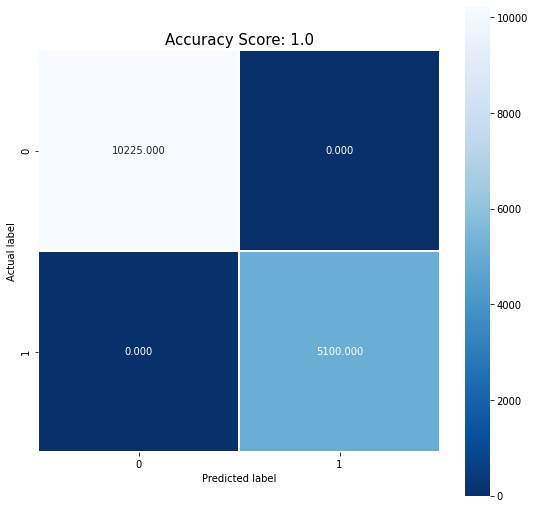

In [45]:
from sklearn import metrics
predictions = rf.predict(X_train)
cm = metrics.confusion_matrix(y_train, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);